# Analyse Exploratoire des Données (EDA) - Secteurs Bancaire et Marketing

Ce notebook présente une analyse exploratoire complète de deux datasets :
1. **Secteur Bancaire** : Détection de fraude dans les transactions par carte de crédit
2. **Secteur Marketing** : Segmentation des clients selon leurs interactions avec les campagnes

## Table des Matières
1. [Configuration et Imports](#1-configuration-et-imports)
2. [Téléchargement des Datasets](#2-téléchargement-des-datasets)
3. [Analyse Secteur Bancaire - Détection de Fraude](#3-analyse-secteur-bancaire)
4. [Analyse Secteur Marketing - Segmentation Client](#4-analyse-secteur-marketing)
5. [Conclusions et Recommandations](#5-conclusions-et-recommandations)

---

## 1. Configuration et Imports

Installation et importation de toutes les bibliothèques nécessaires pour l'analyse.

In [2]:
# Installation des packages nécessaires
#!pip install kagglehub pandas numpy matplotlib seaborn plotly scikit-learn
#!pip install streamlit dash jupyter-dash

In [3]:
# Imports des bibliothèques
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import os

# Configuration des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configuration pour les graphiques
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("✅ Toutes les bibliothèques ont été importées avec succès !")

✅ Toutes les bibliothèques ont été importées avec succès !


## 2. Téléchargement des Datasets

Téléchargement des datasets depuis Kaggle via KaggleHub.

In [4]:
# Téléchargement du dataset de fraude bancaire
print("📥 Téléchargement du dataset de fraude bancaire...")
try:
    fraud_path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
    print(f"✅ Dataset fraude téléchargé dans : {fraud_path}")
except Exception as e:
    print(f"❌ Erreur lors du téléchargement du dataset fraude : {e}")
    fraud_path = None

📥 Téléchargement du dataset de fraude bancaire...
✅ Dataset fraude téléchargé dans : C:\Users\bello\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3


In [5]:
# Téléchargement du dataset marketing
print("📥 Téléchargement du dataset marketing...")
try:
    marketing_path = kagglehub.dataset_download("rodsaldanha/arketing-campaign")
    print(f"✅ Dataset marketing téléchargé dans : {marketing_path}")
except Exception as e:
    print(f"❌ Erreur lors du téléchargement du dataset marketing : {e}")
    marketing_path = None

📥 Téléchargement du dataset marketing...


100%|█| 352k/352k [00:00<00:00,

Extracting files...
✅ Dataset marketing téléchargé dans : C:\Users\bello\.cache\kagglehub\datasets\rodsaldanha\arketing-campaign\versions\8


In [8]:
# Chargement des datasets
if fraud_path:
    # Recherche du fichier CSV dans le dossier téléchargé
    fraud_files = [f for f in os.listdir(fraud_path) if f.endswith('.csv')]
    if fraud_files:
        fraud_df = pd.read_csv(os.path.join(fraud_path, fraud_files[0]))
        print(f"✅ Dataset fraude chargé : {fraud_df.shape}")
    else:
        print("❌ Aucun fichier CSV trouvé dans le dossier fraude")

if marketing_path:
    # Recherche du fichier CSV dans le dossier téléchargé
    marketing_files = [f for f in os.listdir(marketing_path) if f.endswith('.csv')]
    if marketing_files:
        marketing_df = pd.read_csv(os.path.join(marketing_path, marketing_files[0]))
        print(f"✅ Dataset marketing chargé : {marketing_df.shape}")
    else:
        print("❌ Aucun fichier CSV trouvé dans le dossier marketing")

✅ Dataset fraude chargé : (284807, 31)
✅ Dataset marketing chargé : (2240, 1)


---
# 3. Analyse Secteur Bancaire - Détection de Fraude

## 3.1 Exploration Initiale des Données

In [9]:
# Informations générales sur le dataset de fraude
print("🏦 ANALYSE DU SECTEUR BANCAIRE - DÉTECTION DE FRAUDE")
print("=" * 60)

if 'fraud_df' in locals():
    print(f"📊 Dimensions du dataset : {fraud_df.shape}")
    print(f"📋 Colonnes : {list(fraud_df.columns)}")
    print("\n📈 Informations générales :")
    print(fraud_df.info())
else:
    print("❌ Dataset de fraude non disponible")

🏦 ANALYSE DU SECTEUR BANCAIRE - DÉTECTION DE FRAUDE
📊 Dimensions du dataset : (284807, 31)
📋 Colonnes : ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

📈 Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12  

In [10]:
# Aperçu des premières lignes
if 'fraud_df' in locals():
    print("👀 Aperçu des données :")
    display(fraud_df.head())
    
    print("\n📊 Statistiques descriptives :")
    display(fraud_df.describe())

👀 Aperçu des données :


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



📊 Statistiques descriptives :


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## 3.2 Analyse de la Variable Cible (Fraude)

🎯 Analyse de la variable cible : Class
📊 Distribution des classes :
  Normal: 284,315 (99.83%)
  Fraude: 492 (0.17%)


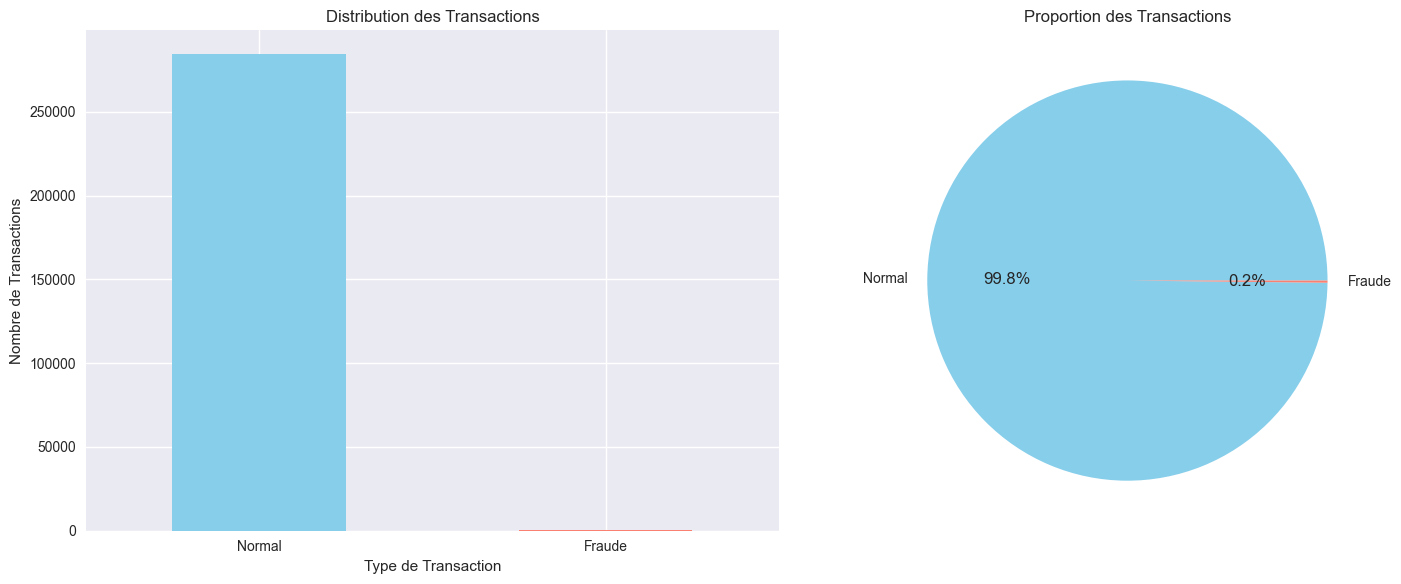


⚖️ Ratio de déséquilibre : 577.9:1
   (Il y a 577.9 transactions normales pour 1 transaction frauduleuse)


In [11]:
# Analyse de la distribution des fraudes
if 'fraud_df' in locals():
    # Supposons que la colonne cible s'appelle 'Class' (0 = normal, 1 = fraude)
    target_col = 'Class' if 'Class' in fraud_df.columns else fraud_df.columns[-1]
    
    print(f"🎯 Analyse de la variable cible : {target_col}")
    print("=" * 50)
    
    # Distribution des classes
    fraud_counts = fraud_df[target_col].value_counts()
    fraud_pct = fraud_df[target_col].value_counts(normalize=True) * 100
    
    print("📊 Distribution des classes :")
    for i, (count, pct) in enumerate(zip(fraud_counts, fraud_pct)):
        label = "Normal" if i == 0 else "Fraude"
        print(f"  {label}: {count:,} ({pct:.2f}%)")
    
    # Visualisation
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Graphique en barres
    fraud_counts.plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
    axes[0].set_title('Distribution des Transactions')
    axes[0].set_xlabel('Type de Transaction')
    axes[0].set_ylabel('Nombre de Transactions')
    axes[0].set_xticklabels(['Normal', 'Fraude'], rotation=0)
    
    # Graphique en secteurs
    axes[1].pie(fraud_counts.values, labels=['Normal', 'Fraude'], 
                autopct='%1.1f%%', colors=['skyblue', 'salmon'])
    axes[1].set_title('Proportion des Transactions')
    
    plt.tight_layout()
    plt.show()
    
    # Calcul du déséquilibre
    imbalance_ratio = fraud_counts.iloc[0] / fraud_counts.iloc[1]
    print(f"\n⚖️ Ratio de déséquilibre : {imbalance_ratio:.1f}:1")
    print(f"   (Il y a {imbalance_ratio:.1f} transactions normales pour 1 transaction frauduleuse)")

## 3.3 Analyse des Valeurs Manquantes et Qualité des Données

In [12]:
# Analyse des valeurs manquantes
if 'fraud_df' in locals():
    print("🔍 ANALYSE DE LA QUALITÉ DES DONNÉES")
    print("=" * 40)
    
    # Valeurs manquantes
    missing_data = fraud_df.isnull().sum()
    missing_pct = (missing_data / len(fraud_df)) * 100
    
    missing_df = pd.DataFrame({
        'Valeurs_Manquantes': missing_data,
        'Pourcentage': missing_pct
    }).sort_values('Valeurs_Manquantes', ascending=False)
    
    print("❓ Valeurs manquantes par colonne :")
    print(missing_df[missing_df['Valeurs_Manquantes'] > 0])
    
    if missing_df['Valeurs_Manquantes'].sum() == 0:
        print("✅ Aucune valeur manquante détectée !")
    
    # Doublons
    duplicates = fraud_df.duplicated().sum()
    print(f"\n🔄 Nombre de doublons : {duplicates}")
    
    # Types de données
    print("\n📋 Types de données :")
    print(fraud_df.dtypes.value_counts())

🔍 ANALYSE DE LA QUALITÉ DES DONNÉES
❓ Valeurs manquantes par colonne :
Empty DataFrame
Columns: [Valeurs_Manquantes, Pourcentage]
Index: []
✅ Aucune valeur manquante détectée !

🔄 Nombre de doublons : 1081

📋 Types de données :
float64    30
int64       1
Name: count, dtype: int64


## 3.4 Analyse Statistique Univariée

📊 ANALYSE STATISTIQUE UNIVARIÉE
📈 Variables numériques à analyser : 30

🔍 Analyse de la variable : Time
------------------------------
Moyenne : 94813.86
Médiane : 84692.00
Écart-type : 47488.15
Min : 0.00
Max : 172792.00
Distribution normale : Non (p-value: 0.0000)


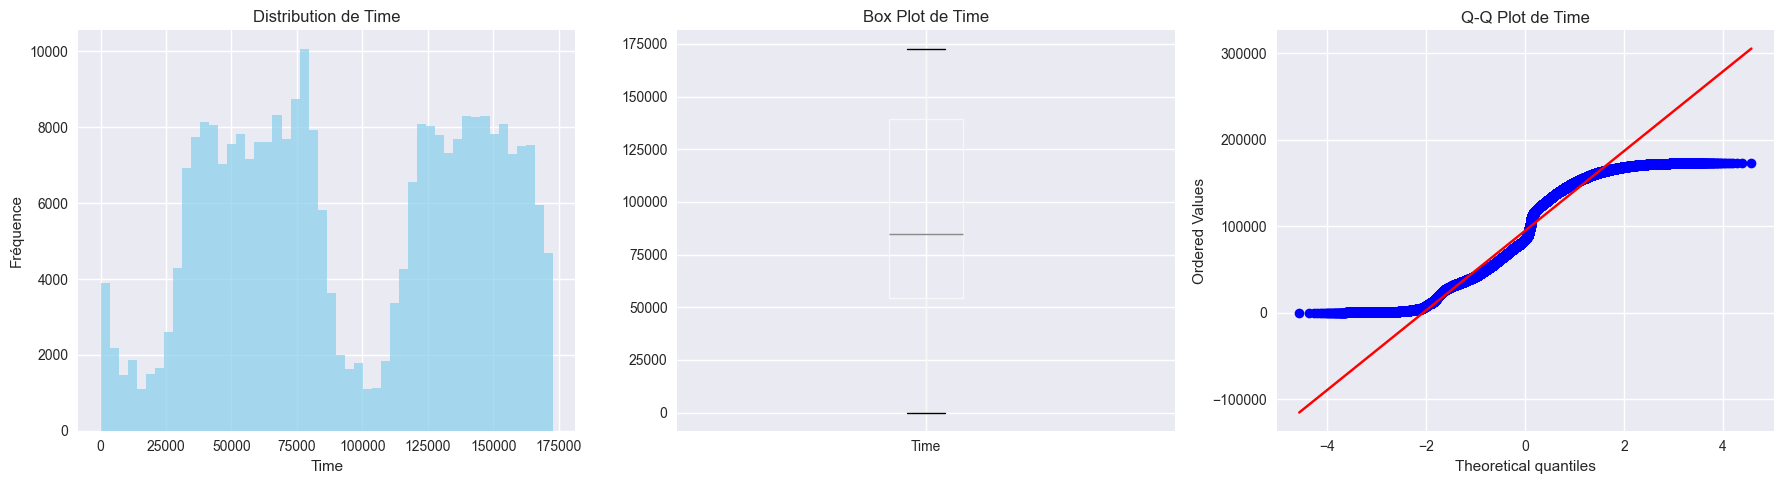


🔍 Analyse de la variable : Amount
------------------------------
Moyenne : 88.35
Médiane : 22.00
Écart-type : 250.12
Min : 0.00
Max : 25691.16
Distribution normale : Non (p-value: 0.0000)


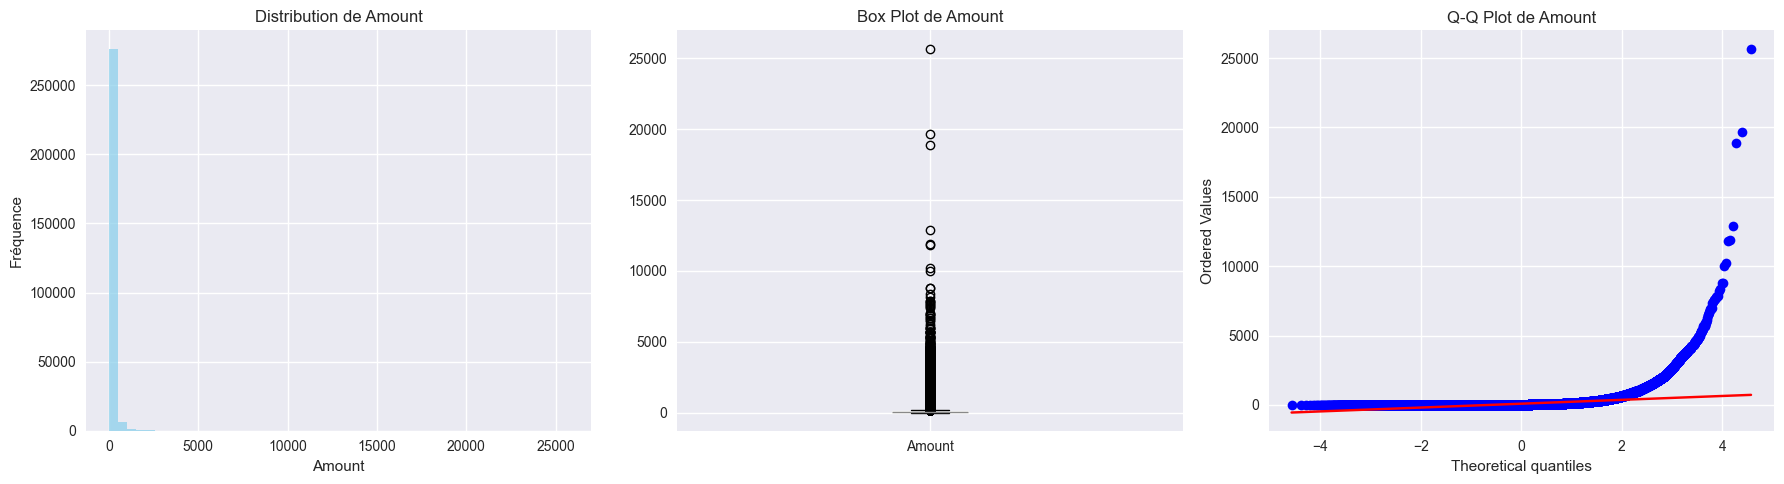

In [13]:
# Analyse univariée des variables numériques
if 'fraud_df' in locals():
    print("📊 ANALYSE STATISTIQUE UNIVARIÉE")
    print("=" * 35)
    
    # Sélection des colonnes numériques (exclut la variable cible)
    numeric_cols = fraud_df.select_dtypes(include=[np.number]).columns.tolist()
    if target_col in numeric_cols:
        numeric_cols.remove(target_col)
    
    print(f"📈 Variables numériques à analyser : {len(numeric_cols)}")
    
    # Analyse des principales variables (Time, Amount si elles existent)
    key_vars = ['Time', 'Amount'] if all(col in fraud_df.columns for col in ['Time', 'Amount']) else numeric_cols[:2]
    
    for var in key_vars:
        if var in fraud_df.columns:
            print(f"\n🔍 Analyse de la variable : {var}")
            print("-" * 30)
            
            # Statistiques descriptives
            stats_desc = fraud_df[var].describe()
            print(f"Moyenne : {stats_desc['mean']:.2f}")
            print(f"Médiane : {stats_desc['50%']:.2f}")
            print(f"Écart-type : {stats_desc['std']:.2f}")
            print(f"Min : {stats_desc['min']:.2f}")
            print(f"Max : {stats_desc['max']:.2f}")
            
            # Test de normalité
            _, p_value = stats.normaltest(fraud_df[var].dropna())
            is_normal = "Oui" if p_value > 0.05 else "Non"
            print(f"Distribution normale : {is_normal} (p-value: {p_value:.4f})")
            
            # Visualisation
            fig, axes = plt.subplots(1, 3, figsize=(18, 5))
            
            # Histogramme
            fraud_df[var].hist(bins=50, ax=axes[0], alpha=0.7, color='skyblue')
            axes[0].set_title(f'Distribution de {var}')
            axes[0].set_xlabel(var)
            axes[0].set_ylabel('Fréquence')
            
            # Box plot
            fraud_df.boxplot(column=var, ax=axes[1])
            axes[1].set_title(f'Box Plot de {var}')
            
            # Q-Q plot
            stats.probplot(fraud_df[var].dropna(), dist="norm", plot=axes[2])
            axes[2].set_title(f'Q-Q Plot de {var}')
            
            plt.tight_layout()
            plt.show()